# Compare raw vs cleaned input data

In [1]:
import torch as th
import pickle
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from utils.utils_pixel import *

/u/seleneledain/.conda/envs/drought2/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
exp_raw = 'nofilter'
exp = 'clean'
split = 'val'
sample_type = 'pixel_data'

batch = 10
batch_size = 40 
epoch = 0

In [3]:
img, label = load_batch(batch_size = batch_size, batch_nbr = batch, sample_type =sample_type, split=split, exp=exp, n_timesteps_out=1)
img_raw, label_raw = load_batch(batch_size = batch_size, batch_nbr = batch, sample_type = sample_type, split=split, exp=exp_raw, n_timesteps_out=1)

### Plot for one pixel

<AxesSubplot:title={'center':'NDVI pred vs label'}>

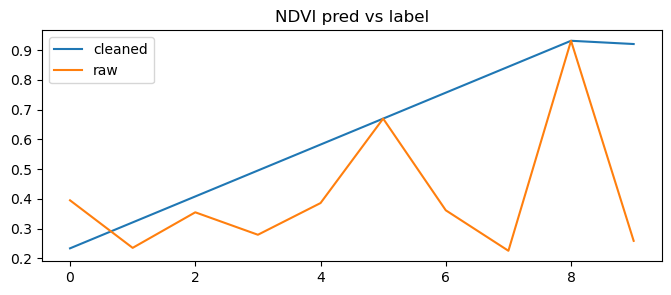

In [12]:
ndvi_idx = 15

ndvi = th.cat([img[:,:,ndvi_idx,:,:] ,label[:,:,ndvi_idx,:,:]], axis=1)
ndvi_raw = th.cat([img_raw[:,:,ndvi_idx,:,:] ,label_raw[:,:,ndvi_idx,:,:]], axis=1)

pix_ndvi = ndvi[5,:,:,:].squeeze(1).squeeze(1).numpy()
pix_raw = ndvi_raw[5,:,:,:].squeeze(1).squeeze(1).numpy()

fig, ax = plt.subplots(1,1,figsize=(8,3))
plt.title('NDVI pred vs label')
sns.lineplot(ax=ax, y=pix_ndvi, x=np.arange(0,len(pix_ndvi),1),label='cleaned')
sns.lineplot(ax=ax, y=pix_raw, x=np.arange(0,len(pix_raw),1),label='raw')

<AxesSubplot:title={'center':'NDVI pred vs label'}>

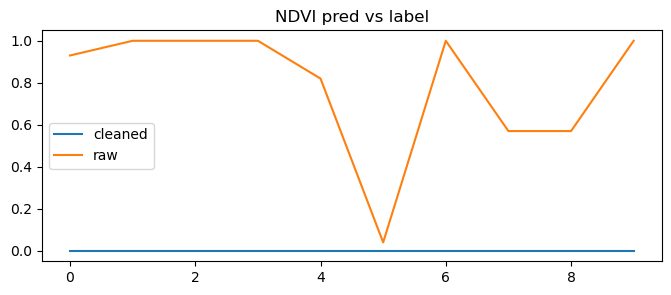

In [13]:
# CP
ndvi_idx = 14

ndvi = th.cat([img[:,:,ndvi_idx,:,:] ,label[:,:,ndvi_idx,:,:]], axis=1)
ndvi_raw = th.cat([img_raw[:,:,ndvi_idx,:,:] ,label_raw[:,:,ndvi_idx,:,:]], axis=1)

pix_ndvi = ndvi[5,:,:,:].squeeze(1).squeeze(1).numpy()
pix_raw = ndvi_raw[5,:,:,:].squeeze(1).squeeze(1).numpy()

fig, ax = plt.subplots(1,1,figsize=(8,3))
plt.title('NDVI pred vs label')
sns.lineplot(ax=ax, y=pix_ndvi, x=np.arange(0,len(pix_ndvi),1),label='cleaned')
sns.lineplot(ax=ax, y=pix_raw, x=np.arange(0,len(pix_raw),1),label='raw')

### Get data on samples

In [ ]:
metadata_path = f'pixel_data/{exp_raw}/'

In [ ]:
# Get date/range of pred
all_loc_dates_files = sorted([f for f in os.listdir(metadata_path) if f.startswith('all_loc_dates')])
full_date_range_files = sorted([f for f in os.listdir(metadata_path) if f.startswith('full_date_range')])

In [ ]:
all_loc_dates = []

for f in all_loc_dates_files:
    with open(metadata_path+f, 'rb') as f :
        all_loc_dates += pickle.load(f)
        
full_date_range = []

for f in full_date_range_files:
    with open(metadata_path+f, 'rb') as f :
        full_date_range += pickle.load(f)

In [ ]:
n_rep = 40000/len(all_loc_dates)
idx_start = int(np.floor((batch_size*batch)/n_rep))
idx_last = int(np.floor((batch_size*batch + batch_size)/n_rep))

In [ ]:
start_date_pred = all_loc_dates[idx_start][3]
end_date_pred = all_loc_dates[idx_last][3]

In [ ]:
all_loc_dates[idx_start][1]